In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

# Dados

Os dados foram obtidos através do portal da transparência da Câmara dos Deputados na aba de Dados Abertos: 

https://dadosabertos.camara.leg.br/swagger/api.html#staticfile

In [2]:
dados_2020 = pd.read_csv('./dados/Ano-2020.csv', sep=';')

Como o intesse aqui são os deputados do Paraná, vamso fazer uma filtragem pelo estado:

In [3]:
deputados_pr = dados_2020.query('sgUF == "PR"')

Não é necessaŕio fazer isso, caso queira aplicar este algorítmo para todos os 513 deputados fique a vontade para remover a linha acima.

# Informações sobre a Base

In [4]:
deputados_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7076 entries, 1221 to 85672
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   txNomeParlamentar          7076 non-null   object 
 1   cpf                        7076 non-null   float64
 2   ideCadastro                7076 non-null   float64
 3   nuCarteiraParlamentar      7076 non-null   float64
 4   nuLegislatura              7076 non-null   int64  
 5   sgUF                       7076 non-null   object 
 6   sgPartido                  7076 non-null   object 
 7   codLegislatura             7076 non-null   int64  
 8   numSubCota                 7076 non-null   int64  
 9   txtDescricao               7076 non-null   object 
 10  numEspecificacaoSubCota    7076 non-null   int64  
 11  txtDescricaoEspecificacao  1788 non-null   object 
 12  txtFornecedor              7076 non-null   object 
 13  txtCNPJCPF                 7076 non-null   o

# Nomes

In [5]:
deputados = list()
for nome_deputado in deputados_pr['txNomeParlamentar'].unique():
    deputados.append(nome_deputado)

print(deputados)

['Gustavo Fruet', 'Rubens Bueno', 'Hermes Parcianello', 'Ricardo Barros', 'Giacobo', 'Gleisi Hoffmann', 'Enio Verri', 'Zeca Dirceu', 'Luiz Nishimori', 'Leandre', 'Aliel Machado', 'Christiane de Souza Yared', 'Diego Garcia', 'Roman', 'Luciano Ducci', 'Sergio Souza', 'Toninho Wandscheer', 'Paulo Eduardo Martins', 'Ney Leprevost', 'Sargento Fahur', 'Pedro Lupion', 'Vermelho', 'Boca Aberta', 'Felipe Francischini', 'Schiavinato', 'Aline Sleutjes', 'Luisa Canziani', 'Filipe Barros', 'Aroldo Martins', 'Luizão Goulart', 'Reinhold Stephanes Junior']


# Custo do Parlamentar para o Estado

Vou criar uma função que retorna o custo do deputado: 

In [6]:
def retorna_custo(nome):
    custo = deputados_pr.query('txNomeParlamentar == "'+str(nome)+'"').vlrLiquido  
    return (nome, custo.values)


Aplicar a função para cada deputado

In [7]:
custo_deputados = list()

for deputado in deputados:
    custo_deputados.append(retorna_custo(deputado))

Salvar em um dataframe

In [8]:
custo_para_pr = pd.DataFrame(custo_deputados, columns=['Nome','Custo'])

# Gasto líquido de cada deputado federal (PR)

Aqui vou apresentar o gasto líquido de cada deputado, numa representação chamada de [Box Plot](http://www.portalaction.com.br/estatistica-basica/31-boxplot). Este típo de visualização é útil pois mostra o mínimo, máximo, e o gasto médio de cada parlamentar numaúnica exibição.

/home/conrado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


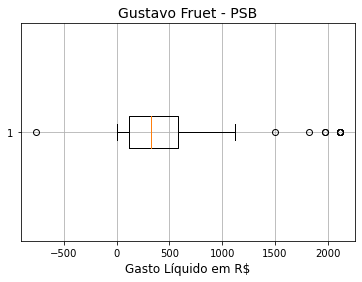

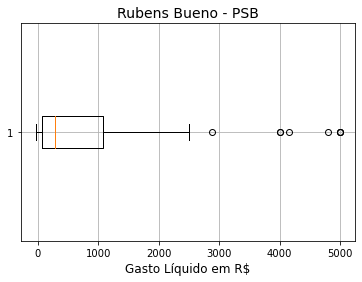

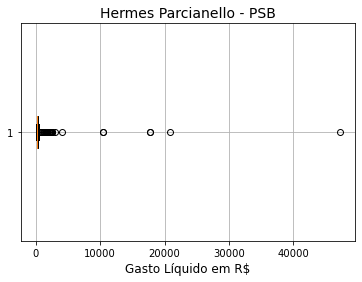

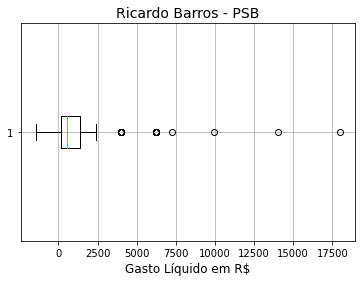

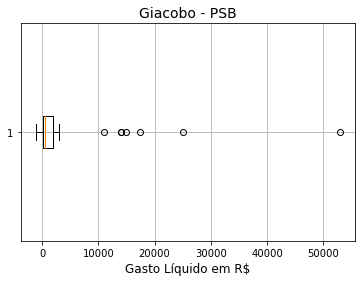

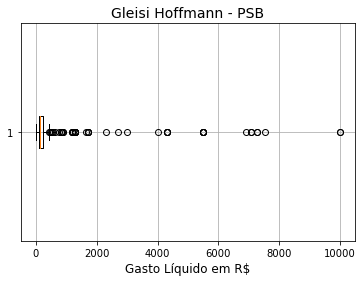

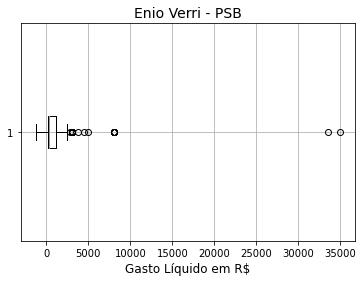

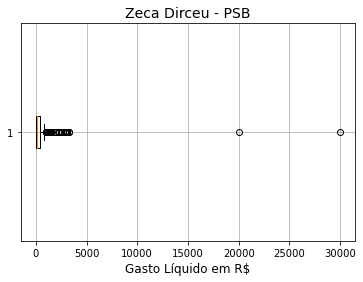

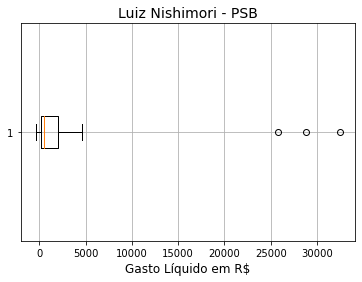

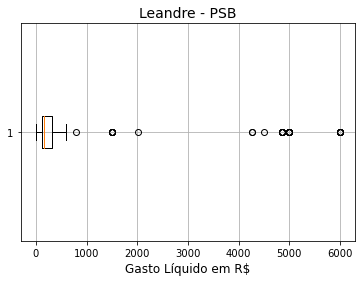

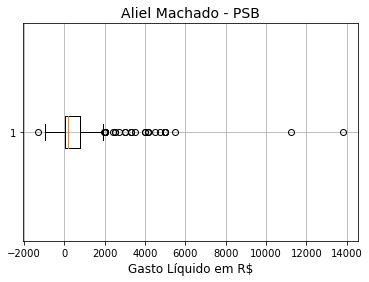

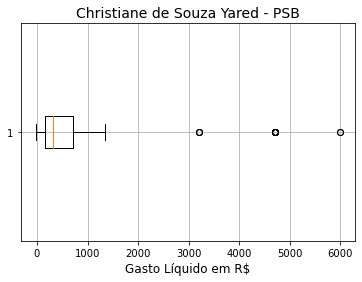

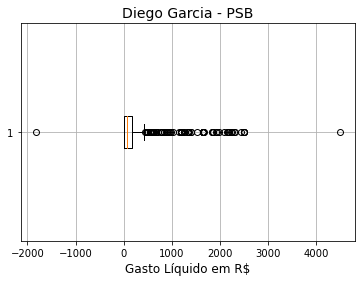

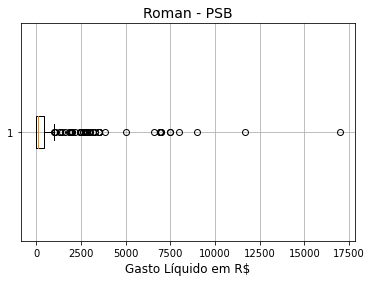

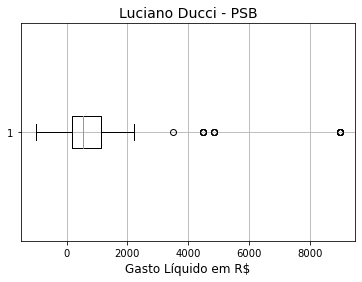

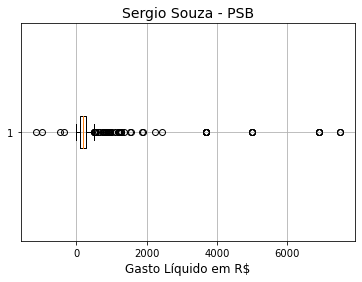

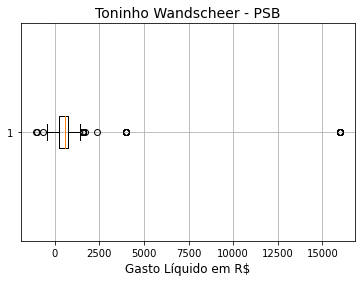

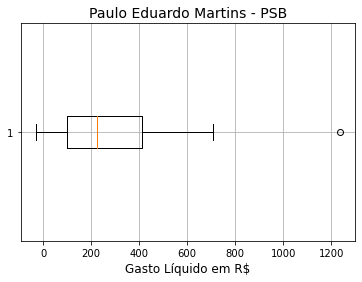

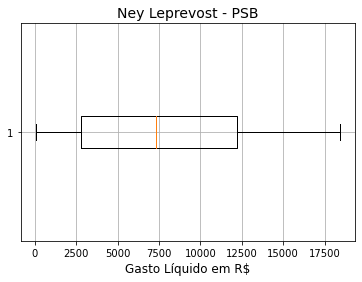

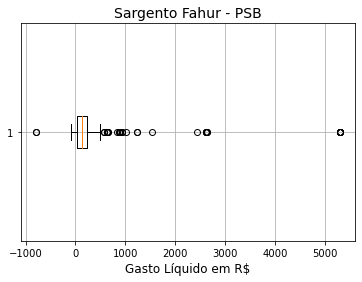

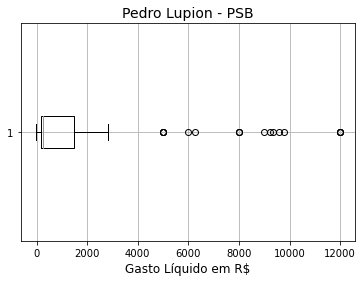

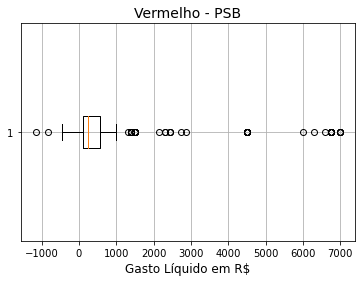

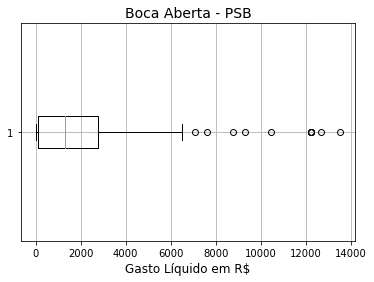

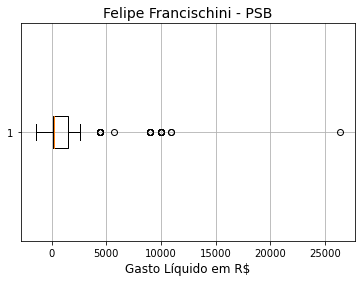

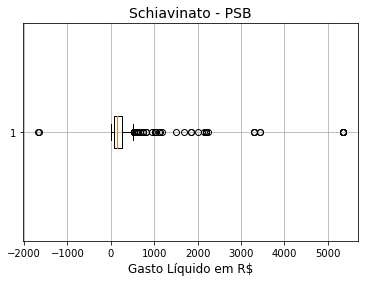

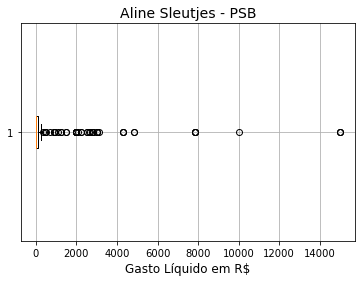

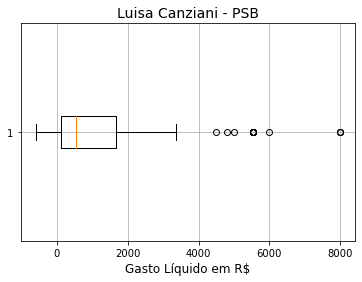

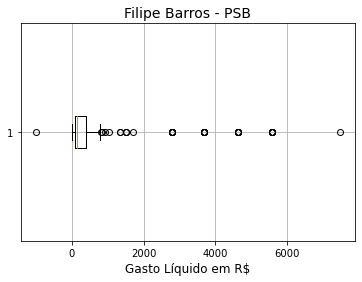

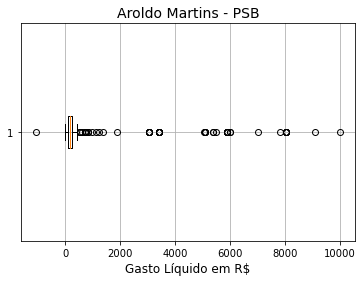

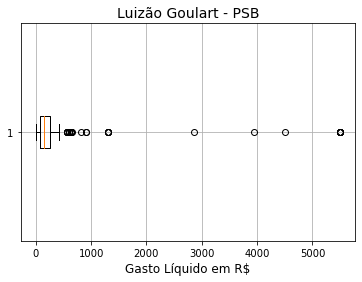

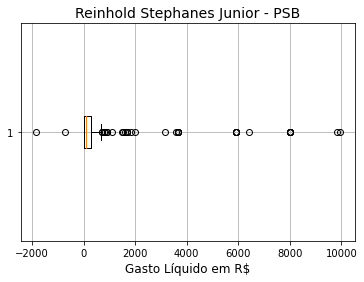

In [9]:
for nome in range(len(custo_para_pr.Nome) ):
    partido = deputados_pr.query('txNomeParlamentar == "'+str("Aliel Machado")+'"').sgPartido.unique()[0]
    
    plt.figure()
    plt.boxplot(custo_para_pr.loc[nome].Custo, vert=False)
    plt.title(str(custo_para_pr.Nome[nome] + ' - '+ partido), fontsize=14)
    plt.xlabel("Gasto Líquido em R$", fontsize=12)
    plt.grid(True)

In [10]:
consumo_mais_comum = deputados_pr.query('txNomeParlamentar == "Aliel Machado"').txtDescricao.value_counts().index[0]




# Gasto mais comum de cada parlamentar

In [11]:
def retorna_gasto_mais_comum(nome):
    gasto_mais_comum = deputados_pr.query(f'txNomeParlamentar == "{nome}"').txtDescricao.value_counts().index[0]
    total_gasto = round(deputados_pr.query(f'txNomeParlamentar == "{nome}"').query(f'txtDescricao == "{gasto_mais_comum}"').vlrLiquido.sum(), 2)
    
    return (nome, gasto_mais_comum, total_gasto)

In [12]:
gasto_mais_comun_deputados = list()

for deputado in deputados:
    gasto_mais_comun_deputados.append(retorna_gasto_mais_comum(deputado))
    
gasto_mais_comun_deputados = pd.DataFrame(gasto_mais_comun_deputados, columns=['Nome','Gasto Mais Comum', 'Total Gasto'])

In [13]:
gasto_mais_comun_deputados

,Nome,Gasto Mais Comum,Total Gasto
0,Gustavo Fruet,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,17083.24
1,Rubens Bueno,PASSAGEM AÉREA - RPA,26296.72
2,Hermes Parcianello,COMBUSTÍVEIS E LUBRIFICANTES.,11690.22
3,Ricardo Barros,PASSAGEM AÉREA - RPA,46407.48
4,Giacobo,SERVIÇOS POSTAIS,5721.49
5,Gleisi Hoffmann,COMBUSTÍVEIS E LUBRIFICANTES.,29329.83
6,Enio Verri,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,22649.28
7,Zeca Dirceu,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",1521.49
8,Luiz Nishimori,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,55764.50
9,Leandre,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,48246.46
